# Qiskit basics

Some basic functions of qiskit to get started quickly. See [qiskit-cheat-sheet](https://github.com/brunorijsman/qiskit-cheat-sheet) for additional functions or the official Qiskit documention.

In [1]:
from qiskit import *
from qiskit.visualization import *
from math import sqrt
import matplotlib

# Registers and circuits

In [2]:
# We can create different subsystems (or registers)
a = QuantumRegister(2, "a") # This creates a 2 qubit system A 
b = QuantumRegister(1, "b") # This creates a 1 qubit system B
c = ClassicalRegister(3, "c") # This creates a classical system of 3 bits

# We can then define a quantum circuit object containing the different systems 
qc = QuantumCircuit(a,b,c)

# We can visualize this quantum circuit (although it is empty now)
qc.draw(initial_state=True)

a_0: |0>
        
a_1: |0>
        
  b: |0>
        
 c_0: 0 
        
 c_1: 0 
        
 c_2: 0

Note that you can also define a circuit without defining registers. For example 

`qc = QuantumCircuit(m, n)`

will define a quantum circuit with m qubits an n classical bits.

### Initializing qubits

You can change the initial state of the qubits if you want (although we could also do this by adding gates to the circuit). By default qubits are initialized to $|0\rangle$ and classical bits are initialized to $0$.

You can do so via

`qc.initialize([r0,r1], k)`

This will initialize qubit k (counting from 0) to the state $|\psi\rangle = \begin{pmatrix} r_0 \\ r_1 \end{pmatrix}$.

# Applying gates

Qiskit has a bunch of default gates (list not exhaustive)

### Single qubit gates 

+ `qc.x(k)` applies Pauli X to qubit k
+ `qc.y(k)` applies Pauli Y to qubit k
+ `qc.z(k)` applies Pauli Z to qubit k
+ `qc.h(k)` applies Hadamard gate to qubit k
+ `qc.u(t0, t1, t2, k)` applies arbitrary single qubit unitary to qubit k

The final gate in that list is 
$$
U(t_0, t_1, t_2) := \begin{pmatrix} \cos(\frac{t_0}{2}) & - e^{i t_2} \sin(\frac{t_0}{2}) \\
e^{i t_1} \sin(\frac{t_0}{2}) & e^{i(t_1 + t_2)} \cos(\frac{t_0}{2})
\end{pmatrix}
$$
and we can write any single qubit unitary in this way.

### Multi qubit gates

Firstly (and probably most importantly) we have the CNOT gate 
+ `qc.cx(k0, k1)` applies CNOT with control on qubit k0 and target on qubit k1

All of the above gates also have controlled versions 
+ `qc.cy(k0,k1)` applies Pauli Y to qubit k1 controlled on k0
+ `qc.cz(k0,k1)` applies Pauli Z to qubit k1 controlled on k0
+ `qc.ch(k0,k1)` applies Hadamard gate to qubit k1 controlled on k0
+ `qc.cu(t0, t1, t2, k0, k1)` applies arbitrary single qubit unitary to qubit k1 controlled on k0

Another interesting two-qubit gate is the swap gate 
+ `qc.swap(k0,k1)` Swaps qubit k0 and qubit k1

You can also control on multiple wires (e.g., `qc.ccx(k0,k1,k2)`) amongst other things. 

In [3]:
# We create maximally entangled state on register A 

# First apply Hadamard
qc.h(0)
# Then cnot
qc.cx(0,1)

qc.draw()

┌───┐     
a_0: ┤ H ├──■──
     └───┘┌─┴─┐
a_1: ─────┤ X ├
          └───┘
  b: ──────────
               
c_0: ══════════
               
c_1: ══════════
               
c_2: ══════════

# Measuring the qubits

We can apply a computational basis measurement to the various qubits and record the outcome in one of the classical bits. For example 

+ `qc.measure(k,j)` measures qubit k and records the outcome in the classical bit j 

+ `qc.measure([k0,k1,...], [j0,j1,,,,])` measures the qubit indexes in the first list and records the outcomes in the classical bit indexes of the second list

+ `qc.measure(A, C)` measures the qubits in register A and stores them in the classical register c

+ `qc.measure_all()` measures all the qubits and creates classical bits to store the outcomes in. 

In [4]:
# For example let's measure the first 2 qubits
qc.measure([0,1],[0,1])
qc.draw()

┌───┐     ┌─┐   
a_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
a_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
  b: ───────────╫──╫─
                ║  ║ 
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═
                     
c_2: ════════════════

# Simulating the circuit

We can use the built in simulators to simulate the running of our circuit and check the resulting statistics. 

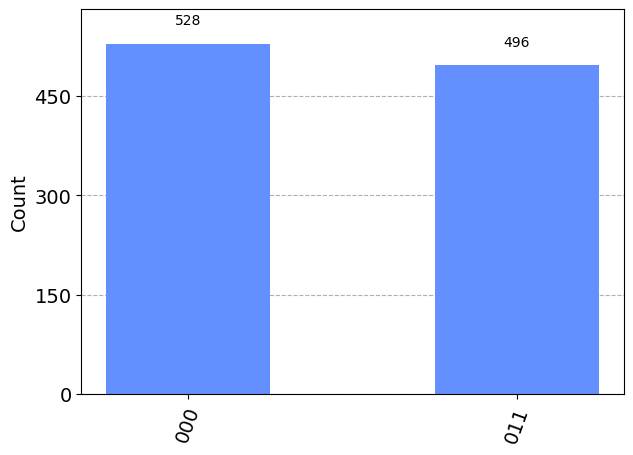

In [8]:
# Simulating the execution of the circuit

backend = Aer.get_backend("qasm_simulator")
result = execute(qc, backend, shots=1024).result()

# Visualizing the results
counts = result.get_counts()
plot_histogram(counts)


# Executing on real hardware

In [12]:
# Get backend for experiment

# replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
# IBMQ.save_account("TOKEN", overwrite=True) 
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_quito')

# prepare the circuit for the backend
new_qc = transpile(qc, backend=backend)

# execute the circuit
job = backend.run(new_qc, shots=1024)

ibmqfactory.load_account:WARNING:2022-10-31 20:56:58,364: Credentials are already in use. The existing account in the session will be replaced.


In [13]:
job.status()

<JobStatus.QUEUED: 'job is queued'>